In [1]:
import yfinance as yf
from pandas_datareader import data as pdr

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sn

from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import pyplot
from random import randint

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)


In [2]:
yf.pdr_override() 

start_date = '2018-01-01'
end_date = '2023-12-31'
stock_data = pdr.get_data_yahoo(['BTC-USD','ETH-USD','DOGE-USD'], start_date, end_date)
close_price = stock_data['Close']
highs = stock_data['High']

[*********************100%***********************]  3 of 3 completed


In [3]:
tot_days = len(close_price['BTC-USD'])
btc_returns = []
eth_returns = []
dog_returns = []

for i in range(tot_days-1):
    btc_ret = (close_price['BTC-USD'][i+1] - close_price['BTC-USD'][i])/close_price['BTC-USD'][i]
    eth_ret  = (close_price['ETH-USD'][i+1] - close_price['ETH-USD'][i])/close_price['ETH-USD'][i]
    dog_ret  = (close_price['DOGE-USD'][i+1] - close_price['DOGE-USD'][i])/close_price['DOGE-USD'][i]
    btc_returns.append(btc_ret)
    eth_returns.append(eth_ret)
    dog_returns.append(dog_ret)

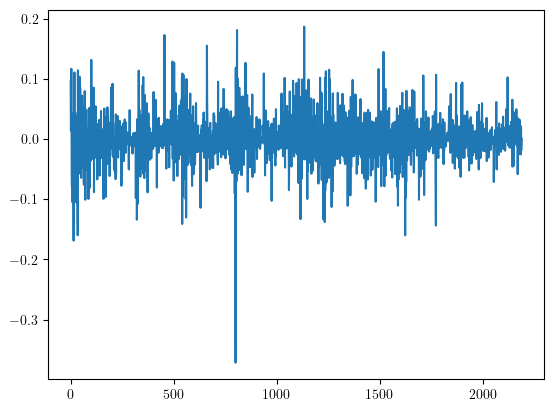

In [4]:
plt.plot(btc_returns)

In [5]:
df = pd.DataFrame(btc_returns, columns=['BTC returns'])
df['ETH returns'] = eth_returns
df['DOGE returns'] = dog_returns

In [16]:
vol_BTC = 100.*np.sqrt(365.)*df['BTC returns'].rolling(30).std()
vol_ETH = 100.*np.sqrt(365.)*df['ETH returns'].rolling(30).std()
vol_DOGE = 100.*np.sqrt(365.)*df['DOGE returns'].rolling(30).std()

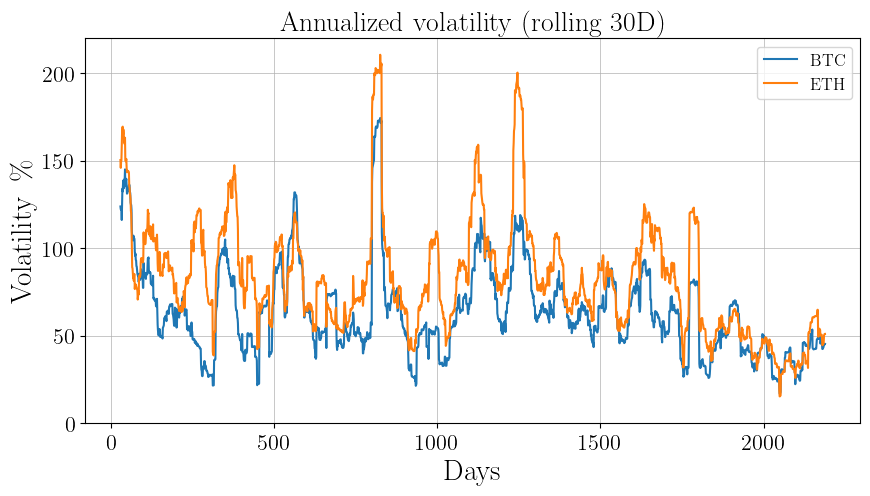

In [20]:
fig = plt.figure(figsize=(10,5)) 
ax = fig.gca()
ax.tick_params(axis='both', which='major', labelsize=16)

#ax.tick_params(axis='both', which='both', direction='in')
ax.set_ylabel(r'${\rm Volatility \,\,\, \%}$', fontsize=21)
ax.set_xlabel(r'${\rm Days}$', fontsize=21)
#ax.axhline(0, xmin=0, xmax=1, color='red',  linewidth=1.5, ls='dashed')
#ax.set_xlim(-0.5, 1) 
ax.set_ylim(0, 220) 

plt.plot(vol_BTC, label=r'${\rm BTC}$')
plt.plot(vol_ETH, label=r'${\rm ETH}$')
plt.legend(prop={'size':12})
#plt.plot(vol_DOGE)
ax.set_title(r'${\rm Annualized \,\, volatility \,\, (rolling \,\, 30D)}$', fontsize=20, color='black')   
ax.grid(linewidth=0.5)



In [8]:
corr_matrix = df.corr()

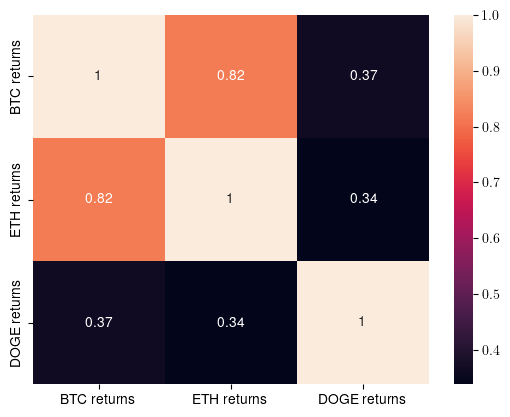

In [9]:
sn.heatmap(corr_matrix, annot=True)
plt.show()

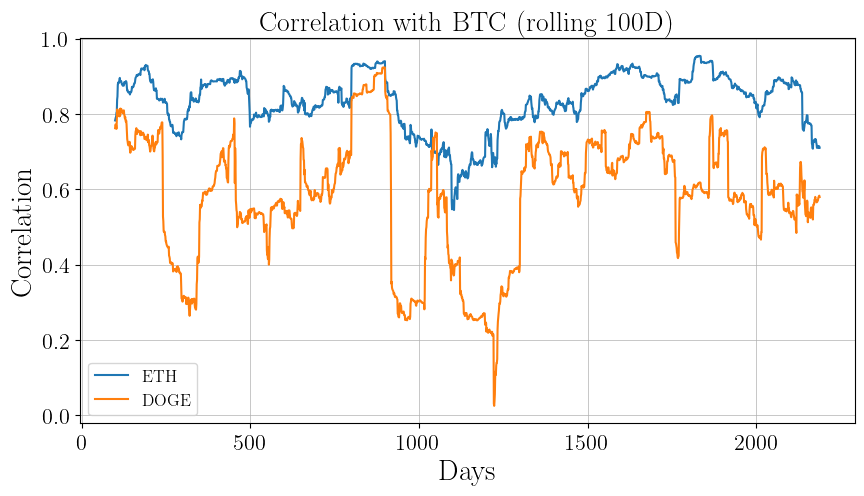

In [22]:
correl_eth = df['BTC returns'].rolling(100).corr(df['ETH returns'])
correl_doge = df['BTC returns'].rolling(100).corr(df['DOGE returns'])

fig = plt.figure(figsize=(10,5)) 
ax = fig.gca()
ax.tick_params(axis='both', which='major', labelsize=16)

#ax.tick_params(axis='both', which='both', direction='in')
ax.set_ylabel(r'${\rm Correlation}$', fontsize=21)
ax.set_xlabel(r'${\rm Days}$', fontsize=21)
#ax.axhline(0, xmin=0, xmax=1, color='red',  linewidth=1.5, ls='dashed')
#ax.set_xlim(-0.5, 1) 
#ax.set_ylim(0, 220) 

plt.plot(correl_eth, label=r'${\rm ETH}$')
plt.plot(correl_doge, label=r'${\rm DOGE}$')
plt.legend(prop={'size':12})

#plt.plot(vol_DOGE)
ax.set_title(r'${\rm Correlation \,\, with \,\, BTC \,\, (rolling \,\, 100D)}$', fontsize=20, color='black')   
ax.grid(linewidth=0.5)

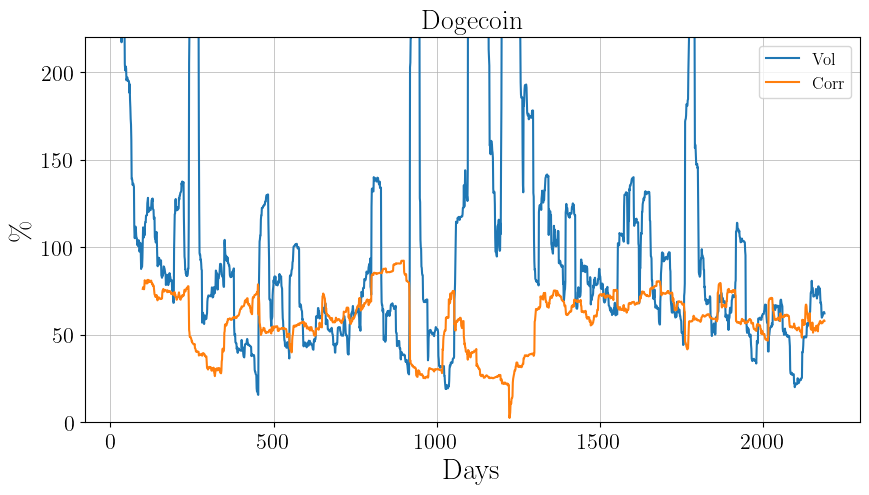

In [28]:
fig = plt.figure(figsize=(10,5)) 
ax = fig.gca()
ax.tick_params(axis='both', which='major', labelsize=16)

#ax.tick_params(axis='both', which='both', direction='in')
ax.set_ylabel(r'${\rm \%}$', fontsize=21)
ax.set_xlabel(r'${\rm Days}$', fontsize=21)
#ax.axhline(0, xmin=0, xmax=1, color='red',  linewidth=1.5, ls='dashed')
#ax.set_xlim(-0.5, 1) 
ax.set_ylim(0, 220) 

plt.plot(vol_DOGE, label=r'${\rm Vol}$')
plt.plot(100.*correl_doge, label=r'${\rm Corr}$')
plt.legend(prop={'size':12})

#plt.plot(vol_DOGE)
ax.set_title(r'${\rm Dogecoin}$', fontsize=20, color='black')   
ax.grid(linewidth=0.5)